Open Machine Learning Course 

# <center> Home Task 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here")**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

**Read data**

In [2]:
try:
    df = pd.read_csv("titanic_train.csv", index_col="PassengerId")
except:
    url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
    df = pd.read_csv(url, index_col="PassengerId")

In [3]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Отбрасываем `Cabin`, а затем — все строки с пропущенными значениями.**

In [6]:
df = df.drop("Cabin", axis=1).dropna()

In [7]:
df.shape

(712, 10)

**1. Постройте картинку, чтобы визуализировать все точечные диаграммы для каждой пары функций `Age`, `Fare`, `SibSp`, `Parch` и `Survived`. ( `scatter_matrix` из Pandas или `pairplot` из Seaborn)**

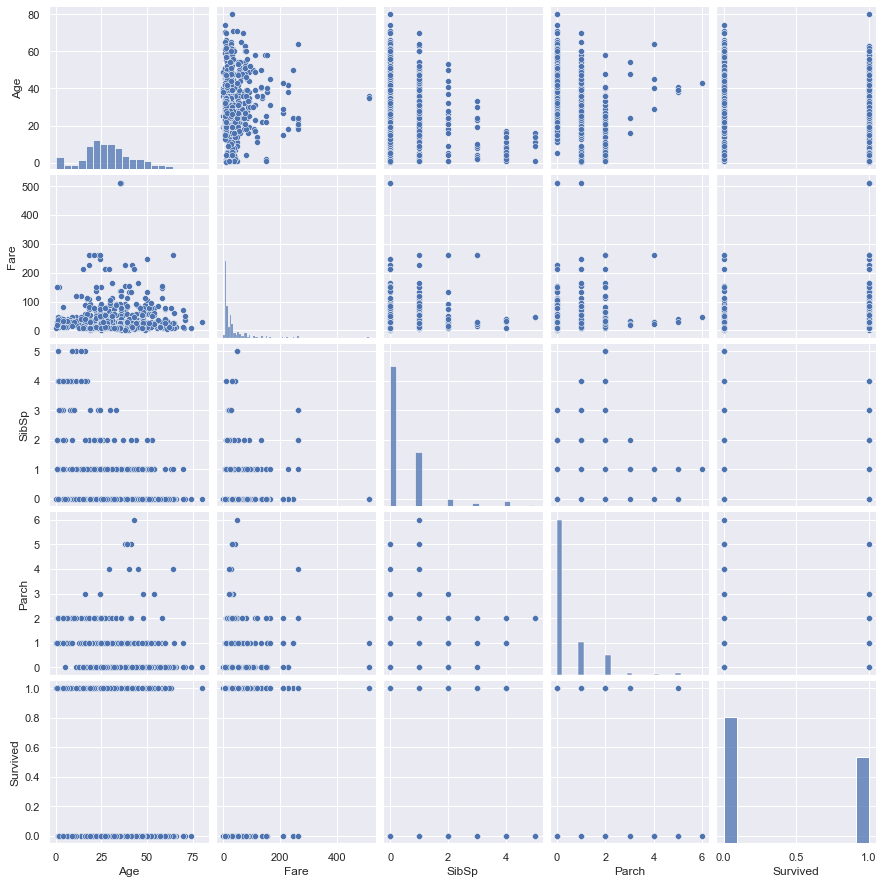

In [8]:
sns.pairplot(df, vars=['Age', 'Fare', 'SibSp', 'Parch', 'Survived'])

**2. Как цена билета (`Fare`) зависит от `Pclass`? Постройте коробочную диаграмму.**

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

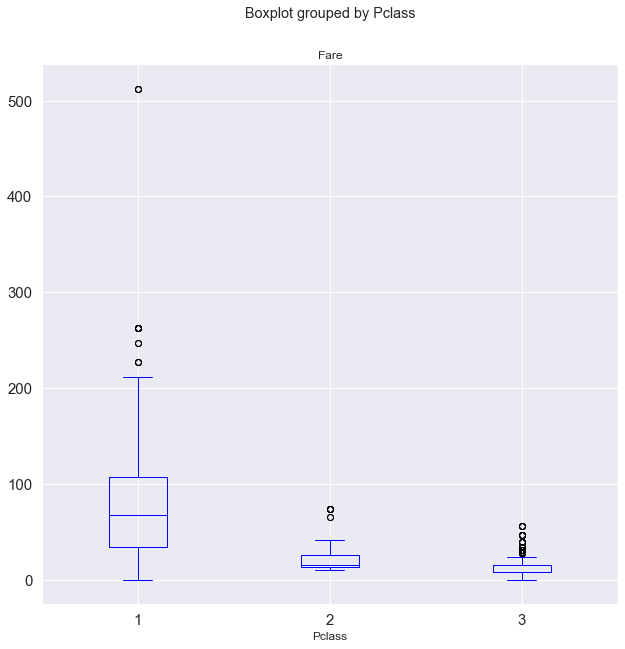

In [9]:
df.boxplot('Fare', by='Pclass', color='blue', figsize=[10, 10], fontsize=15)


**3. Давайте построим тот же график, но ограничим значения `Fare` меньше 95% квантиля исходного вектора (чтобы исключить выбросы, которые делают график менее четким).**

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

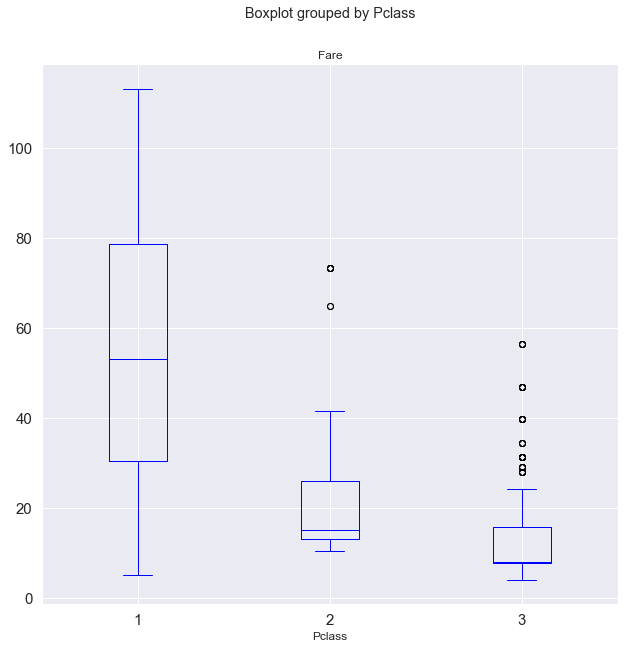

In [10]:
df_IQR = df[(df['Fare'] > df['Fare'].quantile(.00)) &
            (df['Fare'] < df['Fare'].quantile(.95))]
df_IQR.boxplot('Fare', by='Pclass', color='blue',
               figsize=[10, 10], fontsize=15)

**4. Как процент выживших пассажиров зависит от пола пассажиров? Изобразите его с помощью `Seaborn.countplot`, используя аргумент `hue`.**

<AxesSubplot:xlabel='Sex', ylabel='count'>

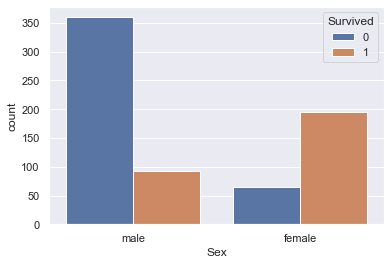

In [11]:
sns.countplot(x='Sex', order=['male', 'female'], hue='Survived', data=df)

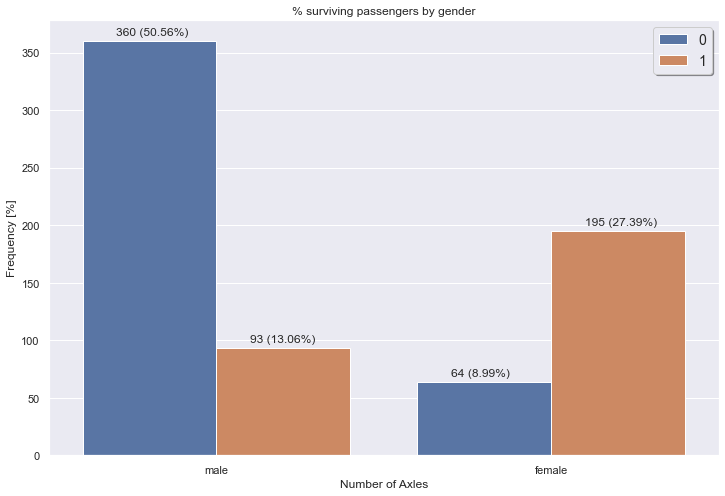

In [23]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="Sex", data=df, hue='Survived')
plt.title('% surviving passengers by gender')
plt.xlabel('Number of Axles')
plt.ylabel('Frequency [%]')
plt.legend(shadow=True, fontsize=14)

for i in ax.patches:
    y = i.get_height()
    ax.annotate(f"{y} ({round(100*y/len(df), 2)}%)", (i.get_x()+.1, y+5))

plt.show()

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

In [13]:
# You code here

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

In [14]:
# You code here